<a href="https://colab.research.google.com/github/blonsbrough/First-Repository/blob/main/PHYS_555_01_DeepLearning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN and Custom Losses on Noisy Data

## Objective
This homework consists of two parts: a theoretical derivation and a practical coding exercise. You will first derive the relationship between the Negative Log Likelihood (NLL) loss and MSE for regression tasks. Then, you will implement a CNN to perform regression on a noisy MNIST dataset using a custom NLL loss function and compare it with MSE.

## Part 1: Theoretical Understanding (20 points)
In the context of regression problems, it is common to assume that the targets, given the inputs, are normally distributed. This assumption leads us to model the outputs of a regression model as a Gaussian distribution conditioned on the input data. For this exercise, you will derive the Negative Log Likelihood (NLL) loss for a Gaussian distributed target variable in a regression setting and compare it with the MSE loss.

Assume that the conditional distribution of the continuous target variable $y$ and given the input $\mathbf{x}$, and parameters $\theta$ is a normal distribution with mean $\mu$ and variance $\sigma^2$, that is $y|\mathbf{x};\theta\sim\cal{N}(\mu,\sigma^2)$, where $\mu$ is the output of the regression model.

1. Derive the negative log-likelihood (NLL) loss for a dataset with N samples
2. Show that minimizing NLL with a constant $\sigma^2$ is equivalent to minimizing an MSE.


## Solution, Part 1:

Consider the normal distribution $$\cal{N} = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$ For a given set of values for x, a constant $\sigma^2$ and an unknown estimate $\mu$.

The Likelihood Function is described by

$$L(\mu) = \Pi_{i=1}^{N}\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Then $$-ln(L) = NLL = -\sum_{i=1}^{N}[-\frac{1}{2}(\frac{x-\mu}{\sigma})^2-ln(\sigma\sqrt{2\pi})]$$

To minimize a function, we take the first derivative and set equal to 0.

$$0 = \frac{\partial - lnL}{\partial \mu} = \sum_{i = 1}^{N}\frac{2}{\sigma^2}(x-\mu)$$

Which is the same as minimizing

$$0 = \sum_{i = 1}^{N}(x-\mu)$$

Similarly, consider the MSE function

$$MSE = \frac{1}{N}\sum_{i = 1}^{N}(x-\mu)^2$$

Minimizing MSE

$$\frac{\partial MSE}{\partial \mu} = 0 = -\frac{1}{N}\sum_{i = 1}^{N}(x-\mu)$$

Which is the same as minimizing

$$0 = \sum_{i = 1}^{N}(x-\mu)$$

So minimizing the MSE function can be done using the same process as minimizing the negative log likelihood of the normal gaussian function.

## Part 2: CNN Regression on rotated MNIST (80 Points)

The objective is to predict the rotation angle with a CNN on artificially rotated MNIST images with added Gaussian noise. The prediction should also come with uncertainty.

In the first part you will develop a CNN to predict the rotation angle of artificially rotated MNIST images. In the second part, you will extend the model to also estimate the mean and variance of the rotation angle after adding Gaussian noise to the rotated MNIST images, using a custom negative log likelihood loss.

### Angle Prediction CNN

1. **Data Preparation:**
   Implement a PyTorch `Dataset` class that rotates MNIST images by random angles and stores the angles as labels.

2. **CNN Implementation:**
   Design and implement a CNN for angle regression. You can do it from scratch using at least two confolutional layers or using transfer learning.

3. **Training:**
   Train your CNN on the training dataset using a suitable regression loss function.

4. **Evaluation:**
   Evaluate the model on the test dataset using Mean Absolute Error (MAE) as a metric, and plot your residuals of true angle vs. (predicted - true).

### Angle Predictive Uncertainty with Gaussian Noise

1. **Data Augmentation with Noise:**
   Modify the custom `Dataset` class to add Gaussian noise to the rotated images.

2. **Model Modification:**
   Extend the CNN to output two values: the predicted mean and variance of the rotation angle.

3. **Custom Loss Function:**
   Implement a custom negative log likelihood loss function that incorporates the predicted mean and variance.

4. **Training and Evaluation:**
   Train the modified CNN with the new loss function and evaluate the model's performance. Show the residuals divided by the predicted uncertainty.

#### Requirements
- Python code for both parts, including data preparation, model implementation, training, and evaluation.
- Use PyTorch for all deep learning aspects.
- Write clean, readable Python code.
- Comments appreciated for parts which are not trivial

Below is starter code to guide you through.

```python
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import numpy as np

# Define the RotatedMNIST Dataset
class RotatedMNIST(Dataset):
    # Constructor accepts a boolean 'add_noise' to determine if Gaussian noise is added
    def __init__(self, mnist_data, add_noise=False):
        # Initialization with mnist_data, add_noise
        # ...

    def __len__(self):
        # Return the total number of items in the dataset
        # ...

    def __getitem__(self, idx):
        # Get the image and label from mnist_data, apply random rotation
        # If add_noise is True, add Gaussian noise to the image
        # Return the rotated (and possibly noised) image and the rotation angle
        # ...

# Load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

#  modify
rotated_train = RotatedMNIST(mnist_train)
rotated_test = RotatedMNIST(mnist_test)
train_loader = DataLoader(rotated_train, batch_size=..., shuffle=True)
test_loader = DataLoader(rotated_test, batch_size=..., shuffle=False)


def nll_loss(output, target, variance):
    loss = # ...
    return loss

class CNN(nn.Module):
    # Your implementation goes here ...

def train(model, loader, optimizer, criterion):
    # Your implementation goes here ...

def evaluate(model, loader):
    # Your implementation goes here ...

# Further model instantiation and training logic goes here ...


In [89]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("I am running on {}".format(device))

I am running on cpu


## Solution, part 2:
First, we construct a dataset that returns rotated and noised images, with labels of rotation. To do this we make use of the Dataset class, and create a subclass RotatedMNIST which returns instead rotated images with an added option for gaussian noise.

### __init__
simply defining the data input, the add_noise boolean, only two things we need to know from the input to construct our new images.

### __len__
just the length of the dataset

### __getitem__
This will run when you retrieve an image from this dataset. takes an image index, ad the object itself, defines a random angle between 0 and 360, and rotates that image that many degrees. Returning the rotated image and the angle it has been rotated. If the boolean add_noise was previously input as True, a transformation is run to add gaussian noise before output.

### mnist_transform
Just defining a transform to use, this time it is only a ToTensor transformation

### dataset and dataloader definition
here we define our training and testing sets as originating from this new rotatedmnist dataset, then define our dataloaders to draw from those datasets. defining batch size and whether or not they are shuffled.

In [90]:
#Import necessary tools
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt
mean = torch.tensor(0)
var = torch.tensor(0.15)
# Define the RotatedMNIST Dataset - done
class RotatedMNIST(Dataset):
    # Constructor accepts a boolean 'add_noise' to determine if Gaussian noise is added - done
    def __init__(self, mnist_data, add_noise=False):
        self.data = mnist_data #self definition of data
        self.noise = add_noise #self definition of the noise boolean

    def __len__(self):
        # Return the total number of items in the dataset - don e
        return len(self.data) #the number of entries

    def __getitem__(self, idx):
        # Get the image and label from mnist_data, apply random rotation - done
        # If add_noise is True, add Gaussian noise to the image - not done
        # Return the rotated (and possibly noised) image and the rotation angle - half done
        image, label = self.data[idx] #acquire the image from the dataset
        angle = random.uniform(0,90) #pick a random angle within whatever range
        rotim = torchvision.transforms.functional.rotate(image,angle) #rotate the image by that angle
        if self.noise == True: #if the noise boolean is true
          imfin = rotim
          mean = 0
          var = 0.15
          imfin = rotim + np.random.normal(mean, var, rotim.shape) #Add gaussian noise with mean 0 and standard deviation 0.15 in the shape of the rotated image
        else:
          imfin = rotim #if the noise boolean is not true, dont add gaussian error
        return imfin, angle #return the final image and the angle of rotation
        print('noise addition not yet')
        print('return noised image not implemented')

#
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=mnist_transform) #Define Training Data
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=mnist_transform) #Define Test Data

#  modify
batch_size = 10 #Set the batch size
rotated_train = RotatedMNIST(mnist_train, add_noise = False) #Define rotated training data
rotated_test = RotatedMNIST(mnist_test, add_noise = False) #Define rotated test data
train_loader = DataLoader(rotated_train, batch_size=batch_size, shuffle = True) #construct the training dataloader
test_loader = DataLoader(rotated_test, batch_size=batch_size, shuffle = False) #construct the test dataloader

### Angle Sample

In [91]:
import numpy as np
i = 0
for rotated_images, rotation_angles in train_loader:
  print(rotation_angles.mean())
  i += 1
  if i > 10:
    break

tensor(47.6075, dtype=torch.float64)
tensor(47.6178, dtype=torch.float64)
tensor(46.1308, dtype=torch.float64)
tensor(35.7685, dtype=torch.float64)
tensor(54.2354, dtype=torch.float64)
tensor(47.7107, dtype=torch.float64)
tensor(48.4507, dtype=torch.float64)
tensor(48.5914, dtype=torch.float64)
tensor(49.0133, dtype=torch.float64)
tensor(52.6545, dtype=torch.float64)
tensor(54.7171, dtype=torch.float64)


### Visualization
A quick test to visualize if our data is actually rotated images.

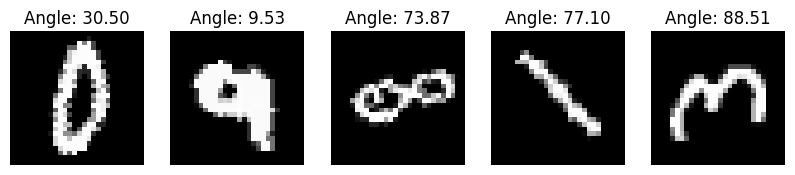

In [92]:
for rotated_images, rotation_angles in train_loader:
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(rotated_images[i].squeeze().numpy(), cmap='gray')
        plt.title(f"Angle: {rotation_angles[i]:.2f}")
        plt.axis('off')
    plt.show()

    break  # Break to show 5 images


### Model Definition
Below we initiate our model, two convolutional layers and a fully connected layer to perform regression.

Then a forward pass.

Then defining the loss function and the optimizer. MAE and Adam.

Then the train and test loop, defined and then run with the dataloaders.

In [93]:
import torch.optim as optim

# Define a simple CNN for regression
class SimpleCNNRegression(nn.Module): #modify the nn.Module default
    def __init__(self): #Initialize model
        super(SimpleCNNRegression, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1) #convolutional layer 1, with 16 kernels, a kernel size of 3.
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) #convolutional layer 2, with 32 kernels from 16, kernel size of 3.
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)  #Fully Connected layer for the regression
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1) #Second fully connected layer

    def forward(self, x): #forward pass, straightforward
        x = self.pool1(self.relu1(self.conv1(x))) #plug into convolution 1
        x = self.pool2(self.relu2(self.conv2(x))) #plug into convolution 2
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu3(self.fc1(x)) #plug into fully connected 1
        x = self.fc2(x) #plug into fully connected 2
        return x #return the prediction

# Instantiate the model
regression_model = SimpleCNNRegression()

# Define the loss function and optimizer
criterion = nn.L1Loss() #L1Loss is a Mean Absolute Error function.
optimizer = optim.Adam(regression_model.parameters(), lr=0.001) #adam is great

# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train() #set training mode

    for epoch in range(num_epochs): #run over a number of epochs
        running_loss = 0.0 #0 out loss

        for inputs, targets in train_loader: #for each input
            optimizer.zero_grad() #zero out the gradient

            outputs = model(inputs) #run the model on the inputs
            loss = criterion((outputs/2).deg2rad().sin(), np.sin(np.radians(targets.unsqueeze(1).float()/2)))  #compute the error in the prediction

            loss.backward() #backpropogate
            optimizer.step() #alter the model in gradient descent

            running_loss += loss.item() #record the latest loss

        epoch_loss = running_loss / len(train_loader) #loss per entry in an epoch, average
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}") #display

# Testing function
def test_model(model, test_loader, criterion):
    model.eval() #set to evaluation mode
    total_loss = 0.0 #no initial loss

    with torch.no_grad(): #dont compute a gradient descent to save computation
        for inputs, targets in test_loader: #loop over the inputs
            outputs = model(inputs) #find the outputs
            loss = criterion(np.sin(np.radians(outputs/2)), np.sin(np.radians(targets.unsqueeze(1).float()/2)))  #compute the loss (with sine of 1/2 the predicted and true values, for a consistent comparison)

            total_loss += loss.item() #add the loss

    avg_loss = total_loss / len(test_loader) #compute the total loss
    print(f"Test Loss: {avg_loss:.4f}") #print the total loss

# Train the model
train_model(regression_model, train_loader, criterion, optimizer, num_epochs=3) #Run the train defined above, input number of epochs

# Test the model
test_model(regression_model, test_loader, criterion) #run the test defined above, just to get overall loss


Epoch 1/3, Loss: 0.0828
Epoch 2/3, Loss: 0.0654
Epoch 3/3, Loss: 0.0581
Test Loss: 0.0547


### Residual calculation and plotting
Below I evaluate the test dataset using the trained model and calculate the true-predicted values and plot them against the true values.

In [94]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

regression_model.eval()
test_loader = test_loader

# Function to calculate residuals
def calculate_residuals(model, data_loader):
    model.eval()
    residuals = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            # Forward pass
            outputs = model(inputs)

            # Calculate residuals
            residual_batch = targets.float().view(-1, 1) - outputs
            residuals.extend(residual_batch.numpy())

    return residuals

# Calculate residuals
residuals = calculate_residuals(regression_model, test_loader)

# Extract true labels from the test dataset
true_labels = [target for _, target in rotated_test]



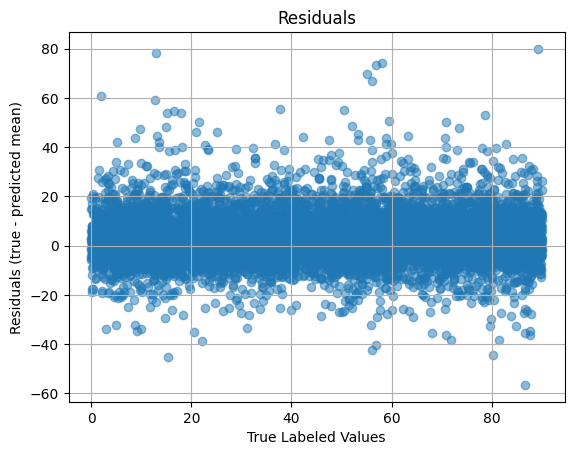

In [95]:
# Plot residuals against true labeled values
plt.scatter(true_labels, residuals, alpha=0.5)
plt.xlabel('True Labeled Values')
plt.ylabel('Residuals (true - predicted mean)')
plt.title('Residuals')
plt.grid(True)
plt.show()

In [96]:
np.mean(residuals)

3.0428083

In [97]:
'''
def nll_loss(output, target, variance):
    loss = # ...
    return loss

class CNN(nn.Module):
    # Your implementation goes here ...

def train(model, loader, optimizer, criterion):
    # Your implementation goes here ...

def evaluate(model, loader):
    # Your implementation goes here ...

# Further model instantiation and training logic goes here ...

'''

'\ndef nll_loss(output, target, variance):\n    loss = # ...\n    return loss\n\nclass CNN(nn.Module):\n    # Your implementation goes here ...\n\ndef train(model, loader, optimizer, criterion):\n    # Your implementation goes here ...\n\ndef evaluate(model, loader):\n    # Your implementation goes here ...\n\n# Further model instantiation and training logic goes here ...\n\n'

### Guassian Noise included dataset
Now to build the dataloaders for the images with both rotation and gaussian noise. Simple switch in boolean, set add_noise = True

In [98]:
batch_size = 20 #Set the batch size
rotated_train = RotatedMNIST(mnist_train, add_noise = True) #Define rotated training data
rotated_test = RotatedMNIST(mnist_test, add_noise = True) #Define rotated test data
train_loader = DataLoader(rotated_train, batch_size=batch_size, shuffle = True) #construct the training dataloader
test_loader = DataLoader(rotated_test, batch_size=batch_size, shuffle = False) #construct the test dataloader

### Visualize

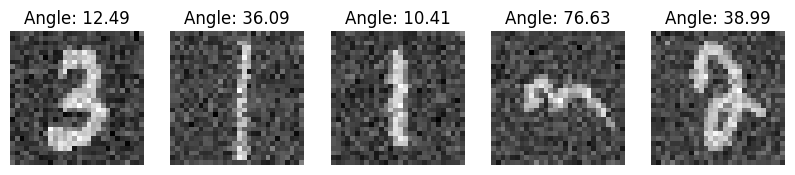

In [99]:
for rotated_images, rotation_angles in train_loader:
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(rotated_images[i].squeeze().numpy(), cmap='gray')
        plt.title(f"Angle: {rotation_angles[i]:.2f}")
        plt.axis('off')
    plt.show()

    break  # Break to show 5 images


### Defining a new regression problem.


In [ ]:
import torch.optim as optim

# Define a complex CNN for regression
class ComplexCNNRegression(nn.Module): #modify the nn.Module default
    def __init__(self): #Initialize model
        super(ComplexCNNRegression, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1) #convolutional layer 1, with 16 kernels, a kernel size of 3.
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) #convolutional layer 2, with 32 kernels from 16, kernel size of 3.
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)  #Fully Connected layer for regression for
        self.relu3 = nn.ReLU()
        self.mean = nn.Linear(128,1) #fully connected output for mean
        self.var = nn.Linear(128,1) #fully connected output for variance

    def forward(self, x): #forward pass, straightforward
        x = self.pool1(self.relu1(self.conv1(x.float()))) #plug into convolution 1
        x = self.pool2(self.relu2(self.conv2(x))) #plug into convolution 2
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu3(self.fc1(x)) #plug into fully connected 1
        mean = self.mean(x) #plug into fully connected mean measure
        var = self.var(x)
        return mean, var #return the prediction

# Instantiate the model
regression_model = ComplexCNNRegression()

# Define the loss function and optimizer
class NLLLoss(nn.Module):
    def __init__(self):
        super(NLLLoss, self).__init__()

    def forward(self, mean_pred, var_pred, target):
        # Calculate the negative log likelihood
        nll_loss =  0.5 * (((target - mean_pred) ** 2) / var_pred) + 0.5 * torch.log((2 * torch.tensor(3.141592653589793, dtype=torch.double) * (var_pred**0.5)))

        # Sum the losses across all dimensions
        nll_loss = torch.sum(nll_loss)

        return nll_loss
criterion = NLLLoss()
optimizer = optim.Adam(regression_model.parameters(), lr=0.001) #adam is great

# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train() #set training mode

    for epoch in range(num_epochs): #run over a number of epochs
        running_loss = 0.0 #0 out loss

        for inputs, targets in train_loader: #for each input
            optimizer.zero_grad() #zero out the gradient

            outputmean, outputvar = model(inputs) #run the model on the inputs
            loss = criterion(outputmean,outputvar,targets.unsqueeze(1).float())  #compute the error in the prediction

            loss.backward() #backpropogate
            optimizer.step() #alter the model in gradient descent

            running_loss += loss.item() #record the latest loss

        epoch_loss = running_loss / len(train_loader) #loss per entry in an epoch, average
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}") #display

# Testing function
def test_model(model, test_loader, criterion):
    model.eval() #set to evaluation mode
    total_loss = 0.0 #no initial loss

    with torch.no_grad(): #dont compute a gradient descent to save computation
        for inputs, targets in test_loader: #loop over the inputs
            outputmean, outputvar = model(inputs) #find the outputs
            loss = criterion(outputmean,outputvar,targets.unsqueeze(1).float())  #compute the loss (with sine of 1/2 the predicted and true values, for a consistent comparison)

            total_loss += loss.item() #add the loss

    avg_loss = total_loss / len(test_loader) #compute the total loss
    print(f"Test Loss: {avg_loss:.4f}") #print the total loss

# Train the model
train_model(regression_model, train_loader, criterion, optimizer, num_epochs=6) #Run the train defined above, input number of epochs

# Test the model
test_model(regression_model, test_loader, criterion) #run the test defined above, just to get overall loss


In [ ]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

regression_model.eval()
test_loader = test_loader

# Function to calculate residuals
def calculate_residuals(model, data_loader):
    model.eval()
    residuals = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            # Forward pass
            outputmean, outputvar = model(inputs)
            # Calculate residuals
            residual_batch = targets.float().view(-1, 1) - outputmean
            residuals.extend(residual_batch.numpy())
    return residuals

# Calculate residuals

residuals = calculate_residuals(regression_model, test_loader)

# Extract true labels from the test dataset
true_labels = [target for _, target in rotated_test]



In [ ]:
# Plot residuals against true labeled values
plt.scatter(true_labels, residuals, alpha=0.5)
plt.xlabel('True Labeled Values')
plt.ylabel('Residuals (truemean - predictedmean)/outputvar')
plt.title('Residuals/standard deviation vs True Labeled Values')
plt.grid(True)
plt.show()